# SNAP Exploration of how $R_{EE}$ and Synaptic Dynamics affect fluctuation characteristics

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from scipy.io import loadmat,savemat
from scipy.signal import deconvolve, savgol_filter



from plotnine import *
# import plotly

# import h5py


from pymer4 import Lmer, Lm


from os import listdir




In [122]:
df = pd.read_csv('./fluxQuant/fluxquant.csv')
df

,Ree,Network,Ksyn,CV,ST
0,1.0,1,0.0,1.740983,0.087411
1,1.0,1,0.1,1.920884,0.035662
2,1.0,1,0.2,1.902277,0.141480
3,1.0,1,0.3,1.897402,0.053054
4,1.0,1,0.4,2.129472,0.061611
...,...,...,...,...,...
15295,6.0,50,0.1,1.162336,0.053736
15296,6.0,50,0.2,0.762202,0.010093
15297,6.0,50,0.3,0.617858,0.032285
15298,6.0,50,0.4,0.557951,0.003174


/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV.svg


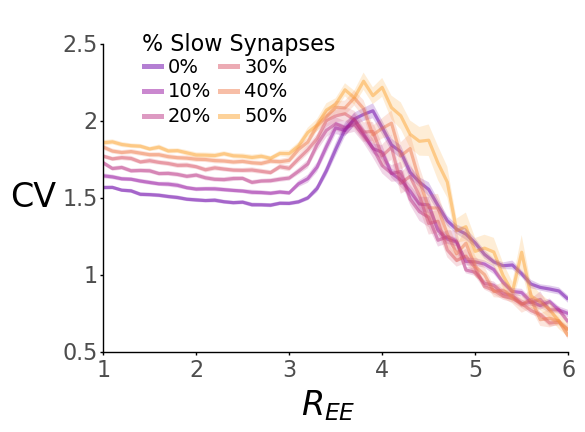

<ggplot: (443635086)>

In [142]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)


p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,3,0.5),limits=(0.5,2.5),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(legend_position=(0.35,0.8),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/CV.svg')
p.save('./figures/fluctuations/CV.svg')

p

In [96]:
df

,Ree,Network,Ksyn,CV,ST
0,1.0,1,0.0,1.749934,0.116860
1,1.0,1,0.1,1.897843,0.058642
2,1.0,1,0.2,1.878904,0.087091
3,1.0,1,0.3,1.974692,0.095320
4,1.0,1,0.4,2.123295,0.105570
...,...,...,...,...,...
9295,4.0,50,0.1,1.205905,0.239887
9296,4.0,50,0.2,1.148440,0.170782
9297,4.0,50,0.3,2.767965,2.555143
9298,4.0,50,0.4,1.386542,0.408428


/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV_0_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV_0_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


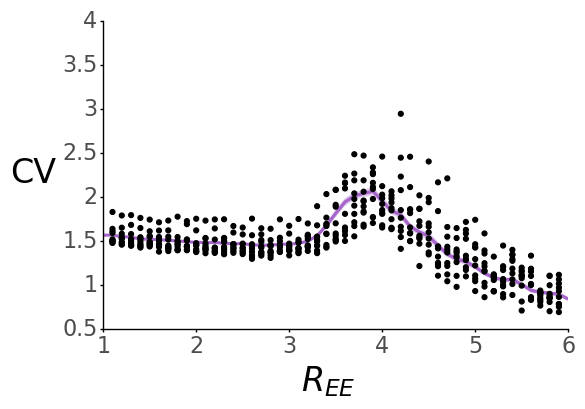

<ggplot: (443223965)>

In [139]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)
    
df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,10)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan

p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high')) +
    geom_line(alpha=0.5,size=1.3,color=colors[0]) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +
   geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='black')+
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,5,0.5),limits=(0.5,4),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/CV_0_indiv.svg')
p.save('./figures/fluctuations/CV_0_indiv.svg')

p

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV_5_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/CV_5_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/

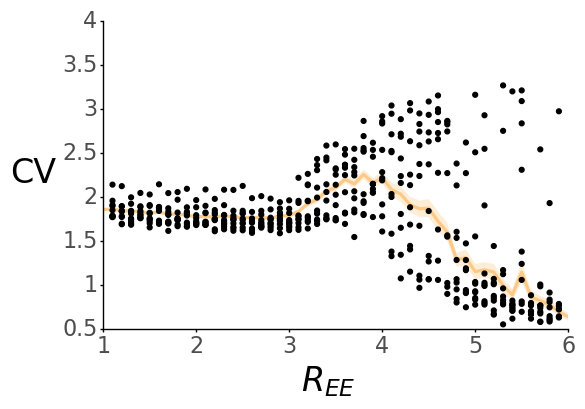

<ggplot: (443754963)>

In [138]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)
    
df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,10)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan

p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high')) +
    geom_line(alpha=0.5,size=1.3,color=colors[-1]) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +
   geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='black')+
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,5,0.5),limits=(0.5,4),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/CV_5_indiv.svg')
p.save('./figures/fluctuations/CV_5_indiv.svg')

p

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST.svg


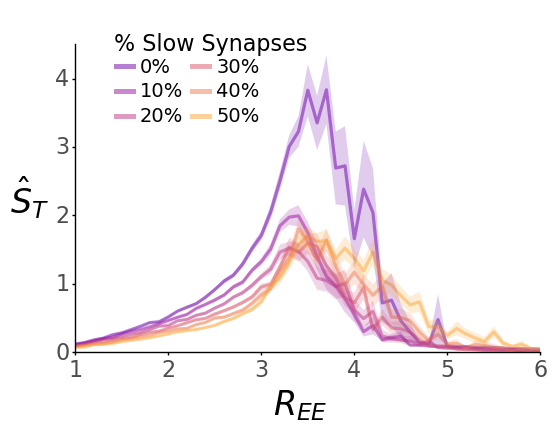

<ggplot: (442471894)>

In [143]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)



p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,5,1),limits=(0,4.5),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(legend_position=(0.35,0.8),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/ST.svg')
p.save('./figures/fluctuations/ST.svg')

p

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST_0_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST_0_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/

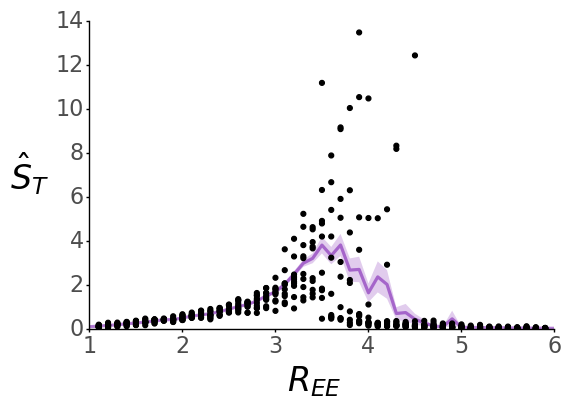

<ggplot: (443104940)>

In [149]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,10)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high')) +
    geom_line(alpha=0.5,size=1.3,color=colors[0]) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +
  geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='black')+

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,16,2),limits=(0,14),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/ST_0_indiv.svg')
p.save('./figures/fluctuations/ST_0_indiv.svg')

p

/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST_5_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 7 rows containing missing values.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./figures/fluctuations/ST_5_indiv.svg
/Users/gavenas/opt/anaconda3/envs/pymer4/lib/

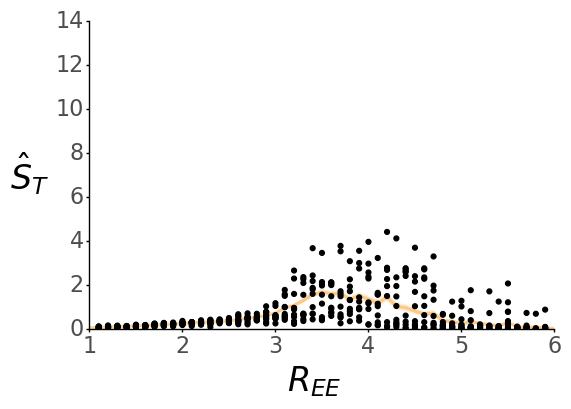

<ggplot: (444233692)>

In [150]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,10)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high')) +
    geom_line(alpha=0.5,size=1.3,color=colors[-1]) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +
  geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='black')+

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,16,2),limits=(0,14),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (6,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('./figures/fluctuations/ST_5_indiv.svg')
p.save('./figures/fluctuations/ST_5_indiv.svg')

p